In [ ]:
import pandas as pd
import numpy as np
import os

data_path = '../Data/'
train_data_path = os.path.join(data_path, 'train_data.csv')
print('[+] train_data_path: {}'.format(train_data_path))

train_data = pd.read_csv(train_data_path)
print('[+] train_data shape: {}'.format(train_data.shape))
train_data.head()

[+] train_data_path: ../Data/train_data.csv
[+] train_data shape: (113, 22)


,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [2]:
# 取出數值欄位
num_features = []

for dtype, col in zip(train_data.dtypes, train_data.columns):
#     print('[+] column: {} type: {}'.format(dtype, col))
    if dtype == 'float64' or dtype == 'int64':
        num_features.append(col)
print('[+] num_features: \n{}'.format(num_features))


[+] num_features: 
['bonus', 'deferral_payments', 'deferred_income', 'director_fees', 'exercised_stock_options', 'expenses', 'from_messages', 'from_poi_to_this_person', 'from_this_person_to_poi', 'loan_advances', 'long_term_incentive', 'other', 'restricted_stock', 'restricted_stock_deferred', 'salary', 'shared_receipt_with_poi', 'to_messages', 'total_payments', 'total_stock_value']


In [3]:
num_train_data = train_data[num_features]
print('[+] num_train_data shape: {}'.format(num_train_data.shape))
num_train_data.head()

[+] num_train_data shape: (113, 19)


,bonus,deferral_payments,deferred_income,director_fees,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,from_this_person_to_poi,loan_advances,long_term_incentive,other,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,1750000.0,NaN,-3504386.0,NaN,19794175.0,46950.0,18.0,42.0,4.0,NaN,1617011.0,174839.0,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,5600000.0,NaN,NaN,NaN,19250000.0,29336.0,108.0,88.0,30.0,NaN,1920000.0,22122.0,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,200000.0,NaN,-4167.0,NaN,1624396.0,22884.0,39.0,13.0,14.0,NaN,NaN,1573324.0,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,800000.0,NaN,NaN,NaN,NaN,118134.0,NaN,NaN,NaN,NaN,602671.0,907502.0,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,1250000.0,NaN,-262500.0,NaN,NaN,35818.0,144.0,199.0,25.0,NaN,375304.0,486.0,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0


In [5]:
train_Y = train_data['poi']
print('[+] train_Y type: {}'.format(type(train_Y)))
print('[+] train_Y shape: {}'.format(train_Y.shape))
train_Y.head()

[+] train_Y type: <class 'pandas.core.series.Series'>
[+] train_Y shape: (113,)


0    True
1    True
2    True
3    True
4    True
Name: poi, dtype: bool

In [7]:
# train_Y label encoding
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
le.fit(train_Y)
train_Y = pd.DataFrame(le.fit_transform(train_Y))
train_Y.columns = ['poi']
print('[+] label encoding train_Y shape: {}'.format(train_Y.shape))
train_Y.head()

[+] label encoding train_Y shape: (113, 1)


C:\ReyesWork\Python\pythonml100\venv\lib\site-packages\sklearn\preprocessing\label.py:219: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ReyesWork\Python\pythonml100\venv\lib\site-packages\sklearn\preprocessing\label.py:235: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


,poi
0,1
1,1
2,1
3,1
4,1


In [9]:
# 空值補 -1, 做線性迴歸
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler, StandardScaler

df = num_train_data.fillna(1)
df_temp = pd.DataFrame(StandardScaler().fit_transform(df))
df_temp.head()

estimator = LinearRegression()
cross_val_score(estimator, df_temp, train_Y, cv=11).mean()

0.004214497772453116

In [19]:
# 相關系數
corr_train_data = train_data.corr()
print('[+] corr_train_data type: {}'.format(type(corr_train_data)))
corr_train_data['poi']

[+] corr_train_data type: <class 'pandas.core.frame.DataFrame'>


bonus                        0.242170
deferral_payments           -0.251548
deferred_income             -0.224654
director_fees                     NaN
exercised_stock_options      0.591972
expenses                     0.136386
from_messages               -0.126760
from_poi_to_this_person      0.127932
from_this_person_to_poi     -0.096864
loan_advances                1.000000
long_term_incentive          0.227805
other                        0.225619
poi                          1.000000
restricted_stock             0.261102
restricted_stock_deferred         NaN
salary                       0.371917
shared_receipt_with_poi      0.120467
to_messages                 -0.023047
total_payments               0.271335
total_stock_value            0.443098
Name: poi, dtype: float64

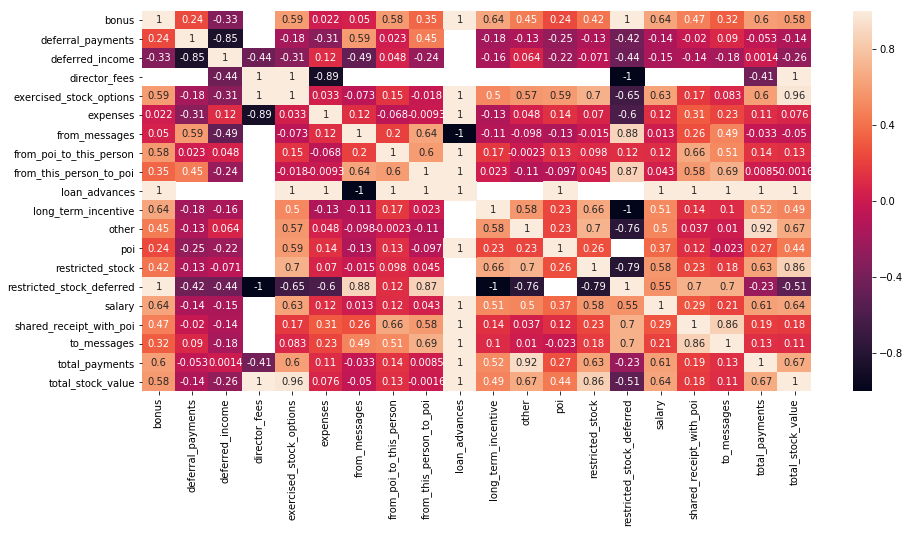

In [21]:
# 熱度圖觀查
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(15, 7))
sns.heatmap(corr_train_data, annot=True)
plt.show()

In [36]:
# 將poi label encoding，測試後沒差異
# le = LabelEncoder()
# for dtype, col in zip(train_data.dtypes, train_data.columns):
#     if col == 'poi':
#         le.fit(train_data[col])
#         train_data[col] = le.fit_transform(train_data[col])
#         break
        
# print(train_data['poi'].head())
len(train_data.columns)
# len(train_data.corr())

train_data = pd.read_csv(train_data_path)
print('[+] train_data shape: {}'.format(train_data.shape))
print('[+] \n'.format(train_data.head()))

len(train_data.corr())


[+] train_data shape: (113, 22)


,name,bonus,deferral_payments,deferred_income,director_fees,email_address,exercised_stock_options,expenses,from_messages,from_poi_to_this_person,...,long_term_incentive,other,poi,restricted_stock,restricted_stock_deferred,salary,shared_receipt_with_poi,to_messages,total_payments,total_stock_value
0,RICE KENNETH D,1750000.0,NaN,-3504386.0,NaN,ken.rice@enron.com,19794175.0,46950.0,18.0,42.0,...,1617011.0,174839.0,True,2748364.0,NaN,420636.0,864.0,905.0,505050.0,22542539.0
1,SKILLING JEFFREY K,5600000.0,NaN,NaN,NaN,jeff.skilling@enron.com,19250000.0,29336.0,108.0,88.0,...,1920000.0,22122.0,True,6843672.0,NaN,1111258.0,2042.0,3627.0,8682716.0,26093672.0
2,SHELBY REX,200000.0,NaN,-4167.0,NaN,rex.shelby@enron.com,1624396.0,22884.0,39.0,13.0,...,NaN,1573324.0,True,869220.0,NaN,211844.0,91.0,225.0,2003885.0,2493616.0
3,KOPPER MICHAEL J,800000.0,NaN,NaN,NaN,michael.kopper@enron.com,NaN,118134.0,NaN,NaN,...,602671.0,907502.0,True,985032.0,NaN,224305.0,NaN,NaN,2652612.0,985032.0
4,CALGER CHRISTOPHER F,1250000.0,NaN,-262500.0,NaN,christopher.calger@enron.com,NaN,35818.0,144.0,199.0,...,375304.0,486.0,True,126027.0,NaN,240189.0,2188.0,2598.0,1639297.0,126027.0
